<a href="https://colab.research.google.com/github/0MindBreaker0/MindBreaker/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B0%D0%B2%D0%BE%D0%BA%D0%B0%D0%B4%D0%BE_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разведочный анализ данных и начало машинного обучения



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
data = pd.read_csv(r'/content/авокадо.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Исследование данных

## Описание данных
Исторические данные о ценах на авокадо и объемах продаж на нескольких рынках США
* Date - Дата наблюдения
* AveragePrice - средняя цена одного авокадо
* type - обычный или органический
* year - год
* Region - город или регион наблюдения
* Total Volume - Общее количество проданных авокадо
* 4046 - Общее количество проданных авокадо с PLU 4046
* 4225 - Общее количество проданных авокадо с PLU 4225
* 4770 - Общее количество проданных авокадо с PLU 4770
* Total Bags - Общее количество проданных сумок авокадо
* Small Bags - Количество проданных маленьких сумок авокадо
* Large Bags - Количество проданных средних сумок авокадо
* XLarge Bags - Количество проданных больших сумок авокадо


Цель: анализ и прогноз цен на авокадо, нахождение зависимостей. Визуализация полученных зависимостей в гистограммах.


Размер датасета

In [ ]:
data.shape

(18249, 14)

Анализ пропущенных значений (Missing Values Analysis)

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0


Анализ дубликатов (Duplicate Analysis):

In [ ]:
data.duplicated().sum()

0

Информация о типах данных и пропусках

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Основные числовые характеристики

In [ ]:
data.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,24.232232,2016-08-13 23:30:43.498273792,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,-9.344636e-18,-1.868927e-17,2.803391e-17,2016.147899
min,0.000000,2015-01-04 00:00:00,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.441771e-01,-2.227343e-01,-1.755796e-01,2015.000000
25%,10.000000,2015-10-25 00:00:00,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,-2.403583e-01,-2.222117e-01,-1.755796e-01,2015.000000
50%,24.000000,2016-08-14 00:00:00,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,-2.088456e-01,-2.118812e-01,-1.755796e-01,2016.000000
75%,38.000000,2017-06-04 00:00:00,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,-1.324880e-01,-1.324354e-01,-1.680905e-01,2017.000000
max,52.000000,2018-03-25 00:00:00,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.769383e+01,2.322010e+01,3.100692e+01,2018.000000
std,15.481045,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,1.000027e+00,1.000027e+00,1.000027e+00,0.939938


In [ ]:
data.describe(include='object')

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


Однофакторный анализ

In [ ]:
data[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']].describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,-9.344636e-18,-1.868927e-17,2.803391e-17
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,1.000027e+00,1.000027e+00,1.000027e+00
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.441771e-01,-2.227343e-01,-1.755796e-01
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,-2.403583e-01,-2.222117e-01,-1.755796e-01
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,-2.088456e-01,-2.118812e-01,-1.755796e-01
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,-1.324880e-01,-1.324354e-01,-1.680905e-01
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.769383e+01,2.322010e+01,3.100692e+01


Посмотрим на распределение цены и количества

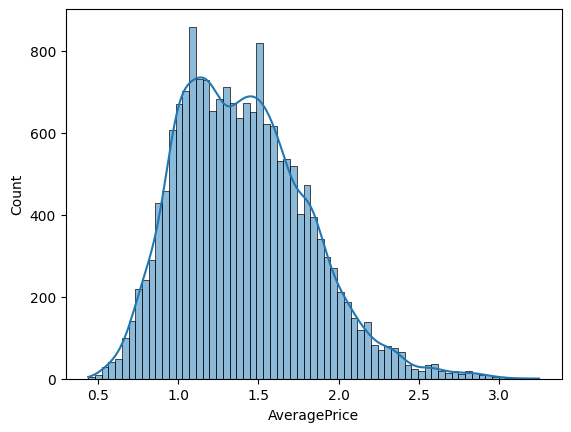

In [ ]:
sns.histplot(data['AveragePrice'], kde=True)
plt.show()

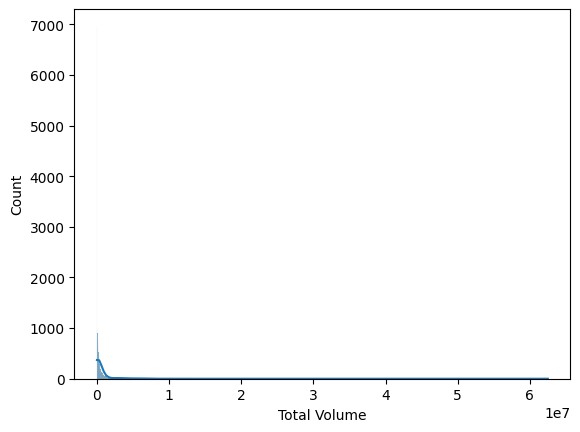

In [ ]:
sns.histplot(data['Total Volume'], kde=True)
plt.show()

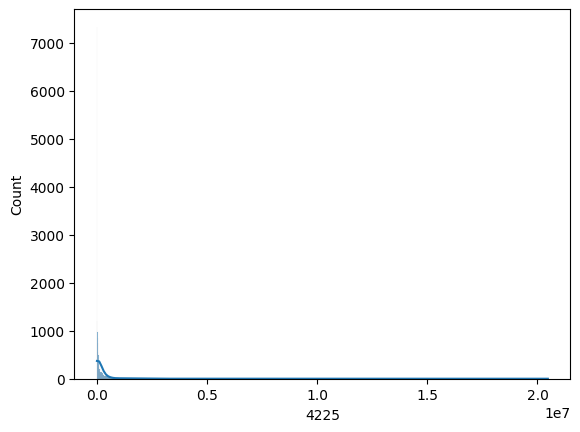

In [ ]:
sns.histplot(data['4225'], kde=True)
plt.show()

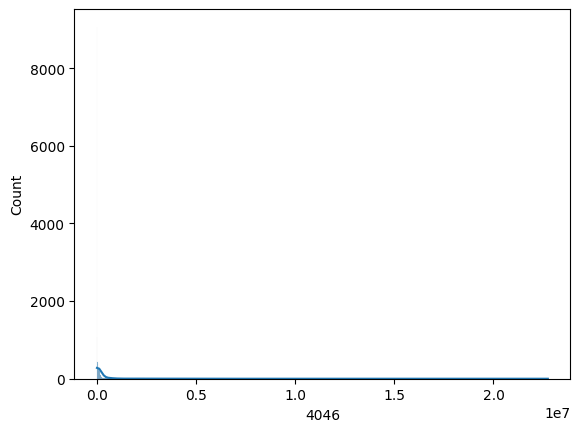

In [ ]:
sns.histplot(data['4046'], kde=True)
plt.show()

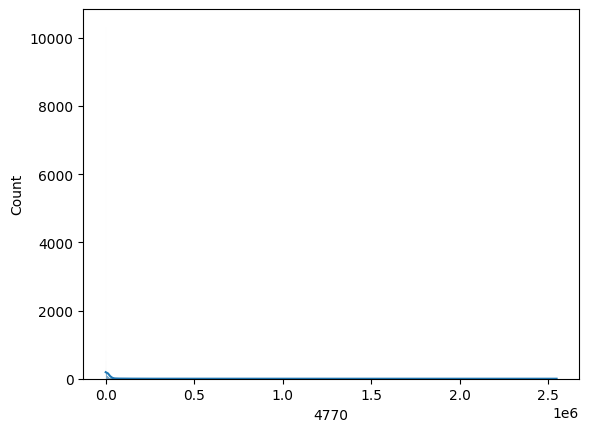

In [ ]:
sns.histplot(data['4770'], kde=True)
plt.show()

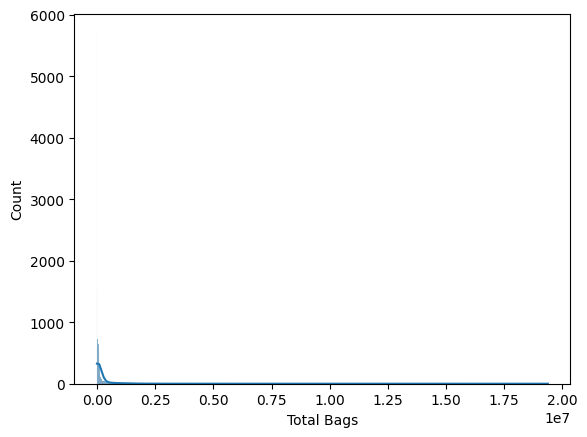

In [ ]:
sns.histplot(data['Total Bags'], kde=True)
plt.show()

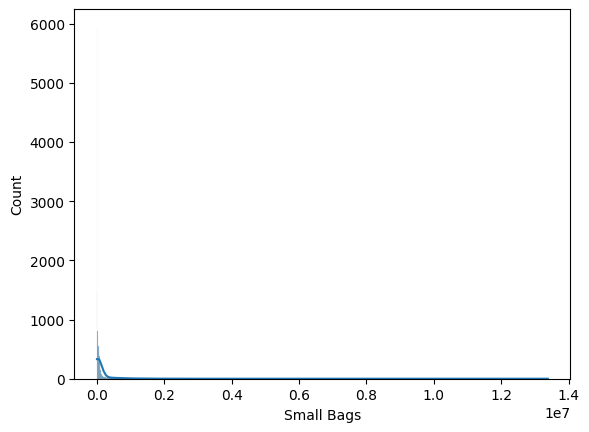

In [ ]:
sns.histplot(data['Small Bags'], kde=True)
plt.show()

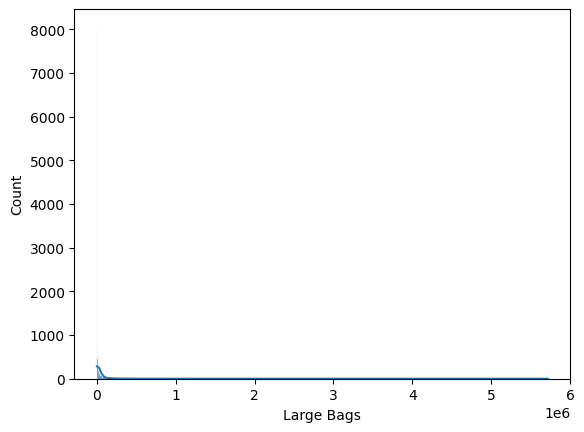

In [ ]:
sns.histplot(data['Large Bags'], kde=True)
plt.show()

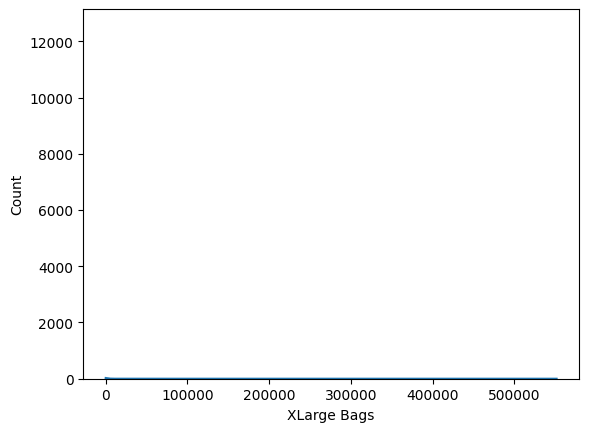

In [ ]:
sns.histplot(data['XLarge Bags'], kde=True)
plt.show()

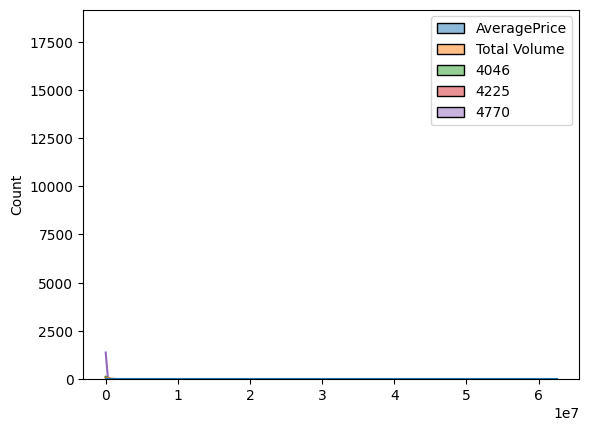

In [ ]:
sns.histplot(data[['AveragePrice','Total Volume','4046','4225','4770']], kde=True)
plt.show()

Проведем анализ корреляции для того, чтобы определить зависимость между показателями

Коэффициент корреляции  ρ  - это мера взаимосвязи между двумя величинами (корреляция Пирсона - мера линейной зависимости).

−1≤ ρ ≤1

Чем больше по модулю коэффициент корреляции  ρ  - тем больше взаимосвязь между величинами.

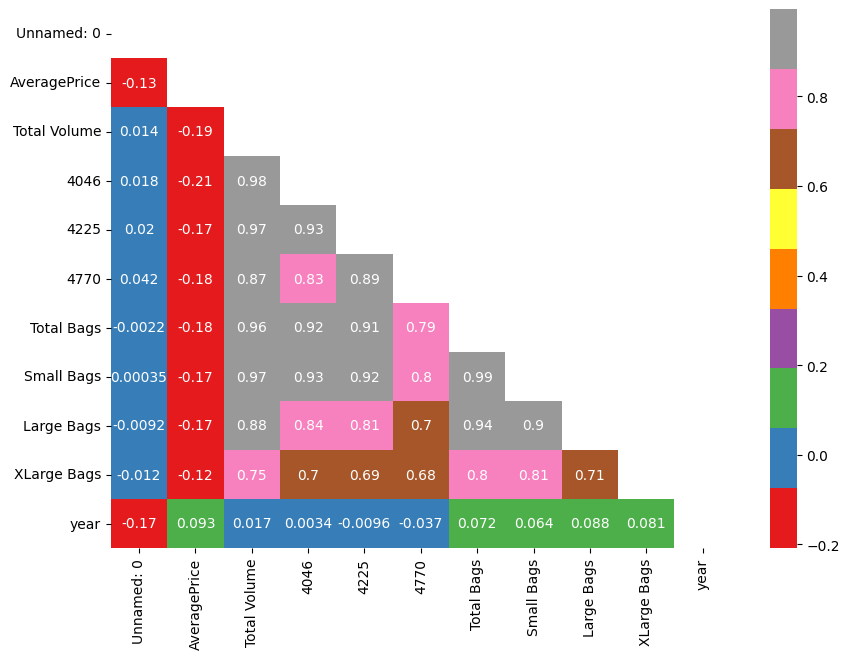

In [ ]:
corr = data.corr(numeric_only=True)
mask = np.triu(corr)

plt.figure(figsize=(10, 7))

sns.heatmap(corr, annot=True, cmap="Set1", mask=mask)

plt.show()


Средняя цена авокадо не имеет сильной зависимости от объемов продаж или других переменных, что может быть связано с внешними факторами.

Объем продаж сильно коррелирует с продажами по PLU и количеством сумок, что логично, так как эти переменные являются компонентами общего объема.

Продажи по PLU и количество сумок сильно коррелируют между собой, что указывает на взаимосвязь между этими переменными.

Год не имеет сильной корреляции с другими переменными, что может означать, что он не сильно влияет на продажи или цену авокадо.

Проведем сравнительный анализ средней цены авокадо по регионам:

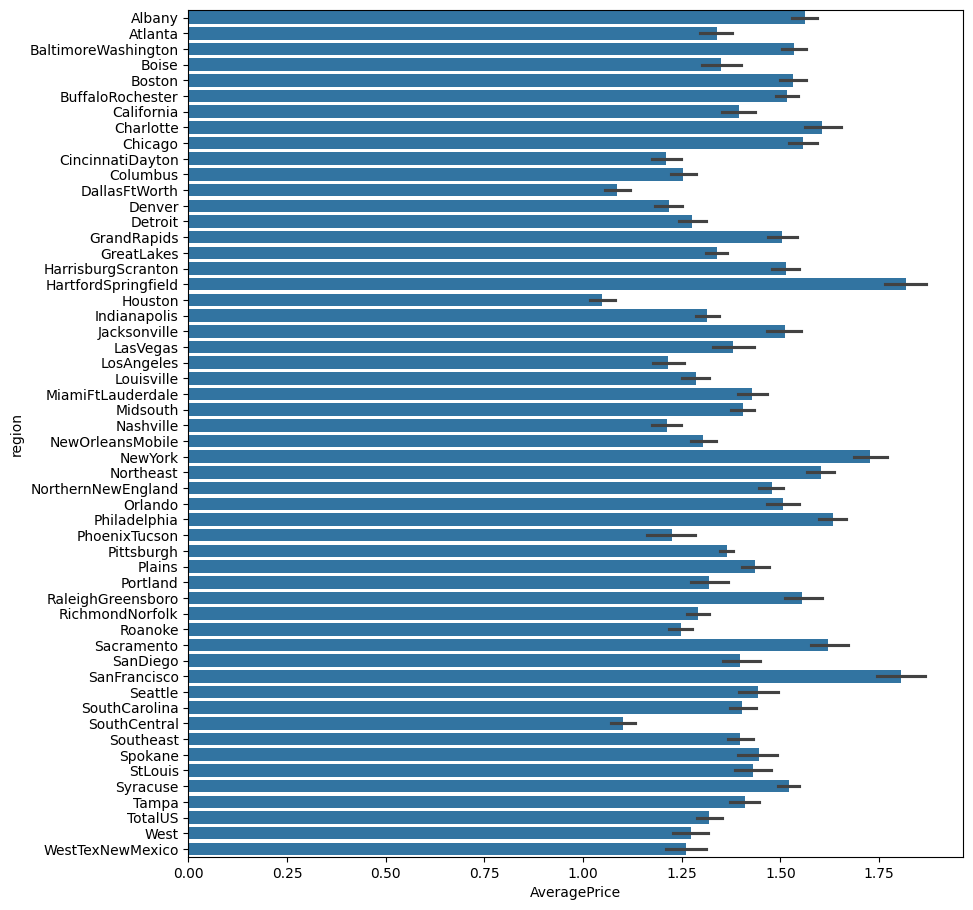

In [ ]:
plt.figure(figsize=(10,11))
sns.barplot(data, x='AveragePrice', y='region')
plt.show()

Цены на авокадо значительно варьируются между регионами. Например, регионы с высокой средней ценой, такие как SanFrancisco и LosAngeles, сильно выделяются.Регионы с низкой средней ценой включают SouthCentral, WestTexNewMexico, и GreatLakes.

Временной анализ средней цены авокадо по типу (органический и обычный):

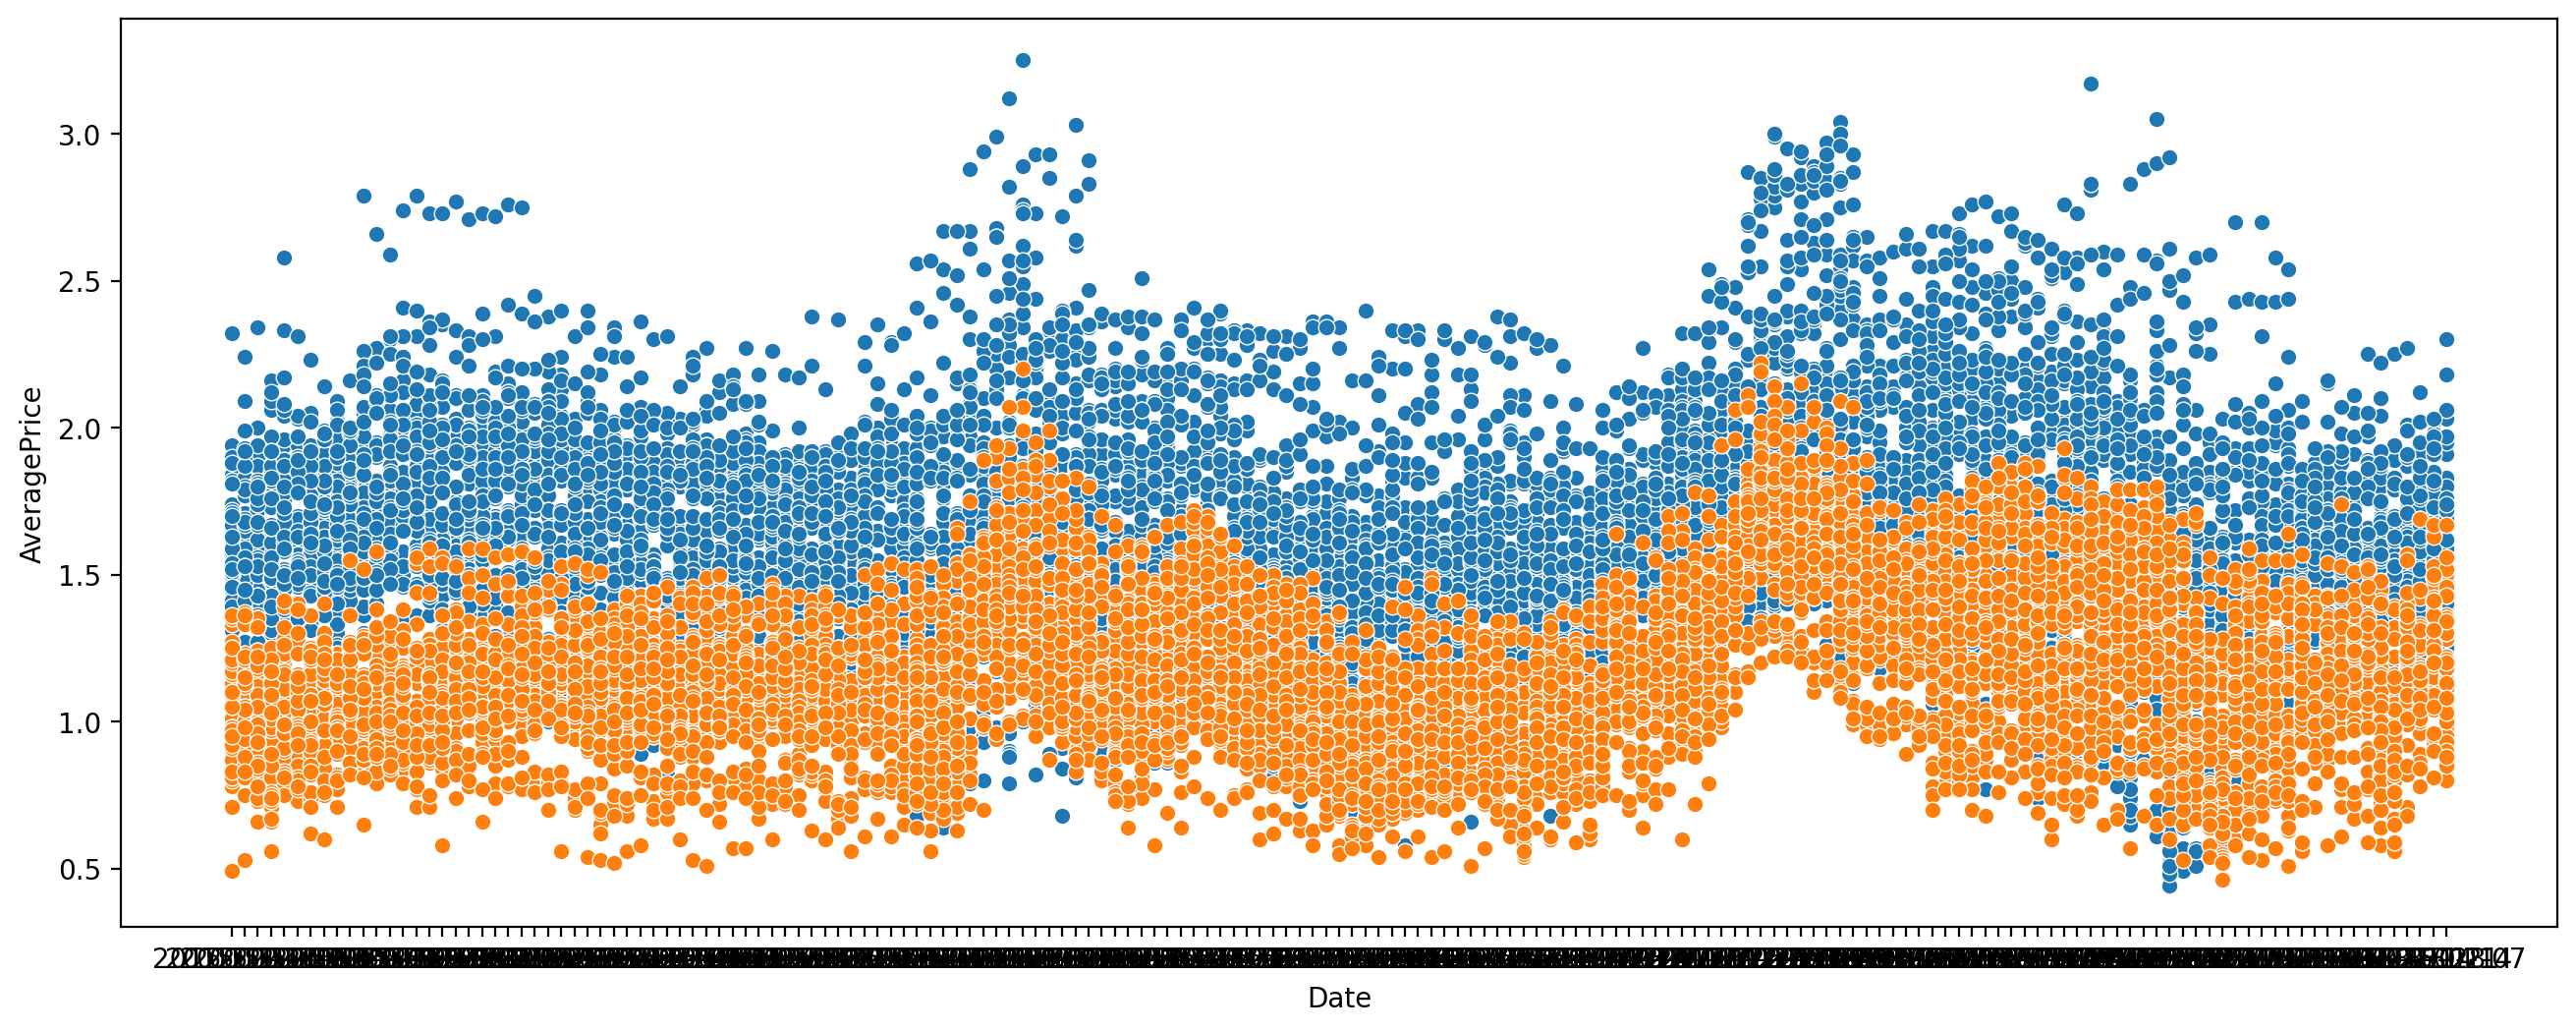

In [ ]:
organic = data[data['type']=='organic']
conventional = data[data['type']=='conventional']


plt.figure(figsize=(16,6), dpi=200)
sns.scatterplot(data= organic, x= 'Date', y= 'AveragePrice')
sns.scatterplot(data= conventional, x= 'Date', y= 'AveragePrice')
plt.show()



Динамика цен:

Органический авокадо (синие точки) consistently дороже обычного (оранжевые точки) на всём временном интервале.

Сезонность:

Можно заметить определенные пики и падения цен, совпадающие для обоих типов, что может быть связано с сезонным спросом или урожайностью.

Дифференциация:

Разрыв в цене между органическим и обычным авокадо остается стабильным на протяжении времени, что указывает на постоянную премиальность органического продукта.

Анализ временных рядов (Time Series Analysis):

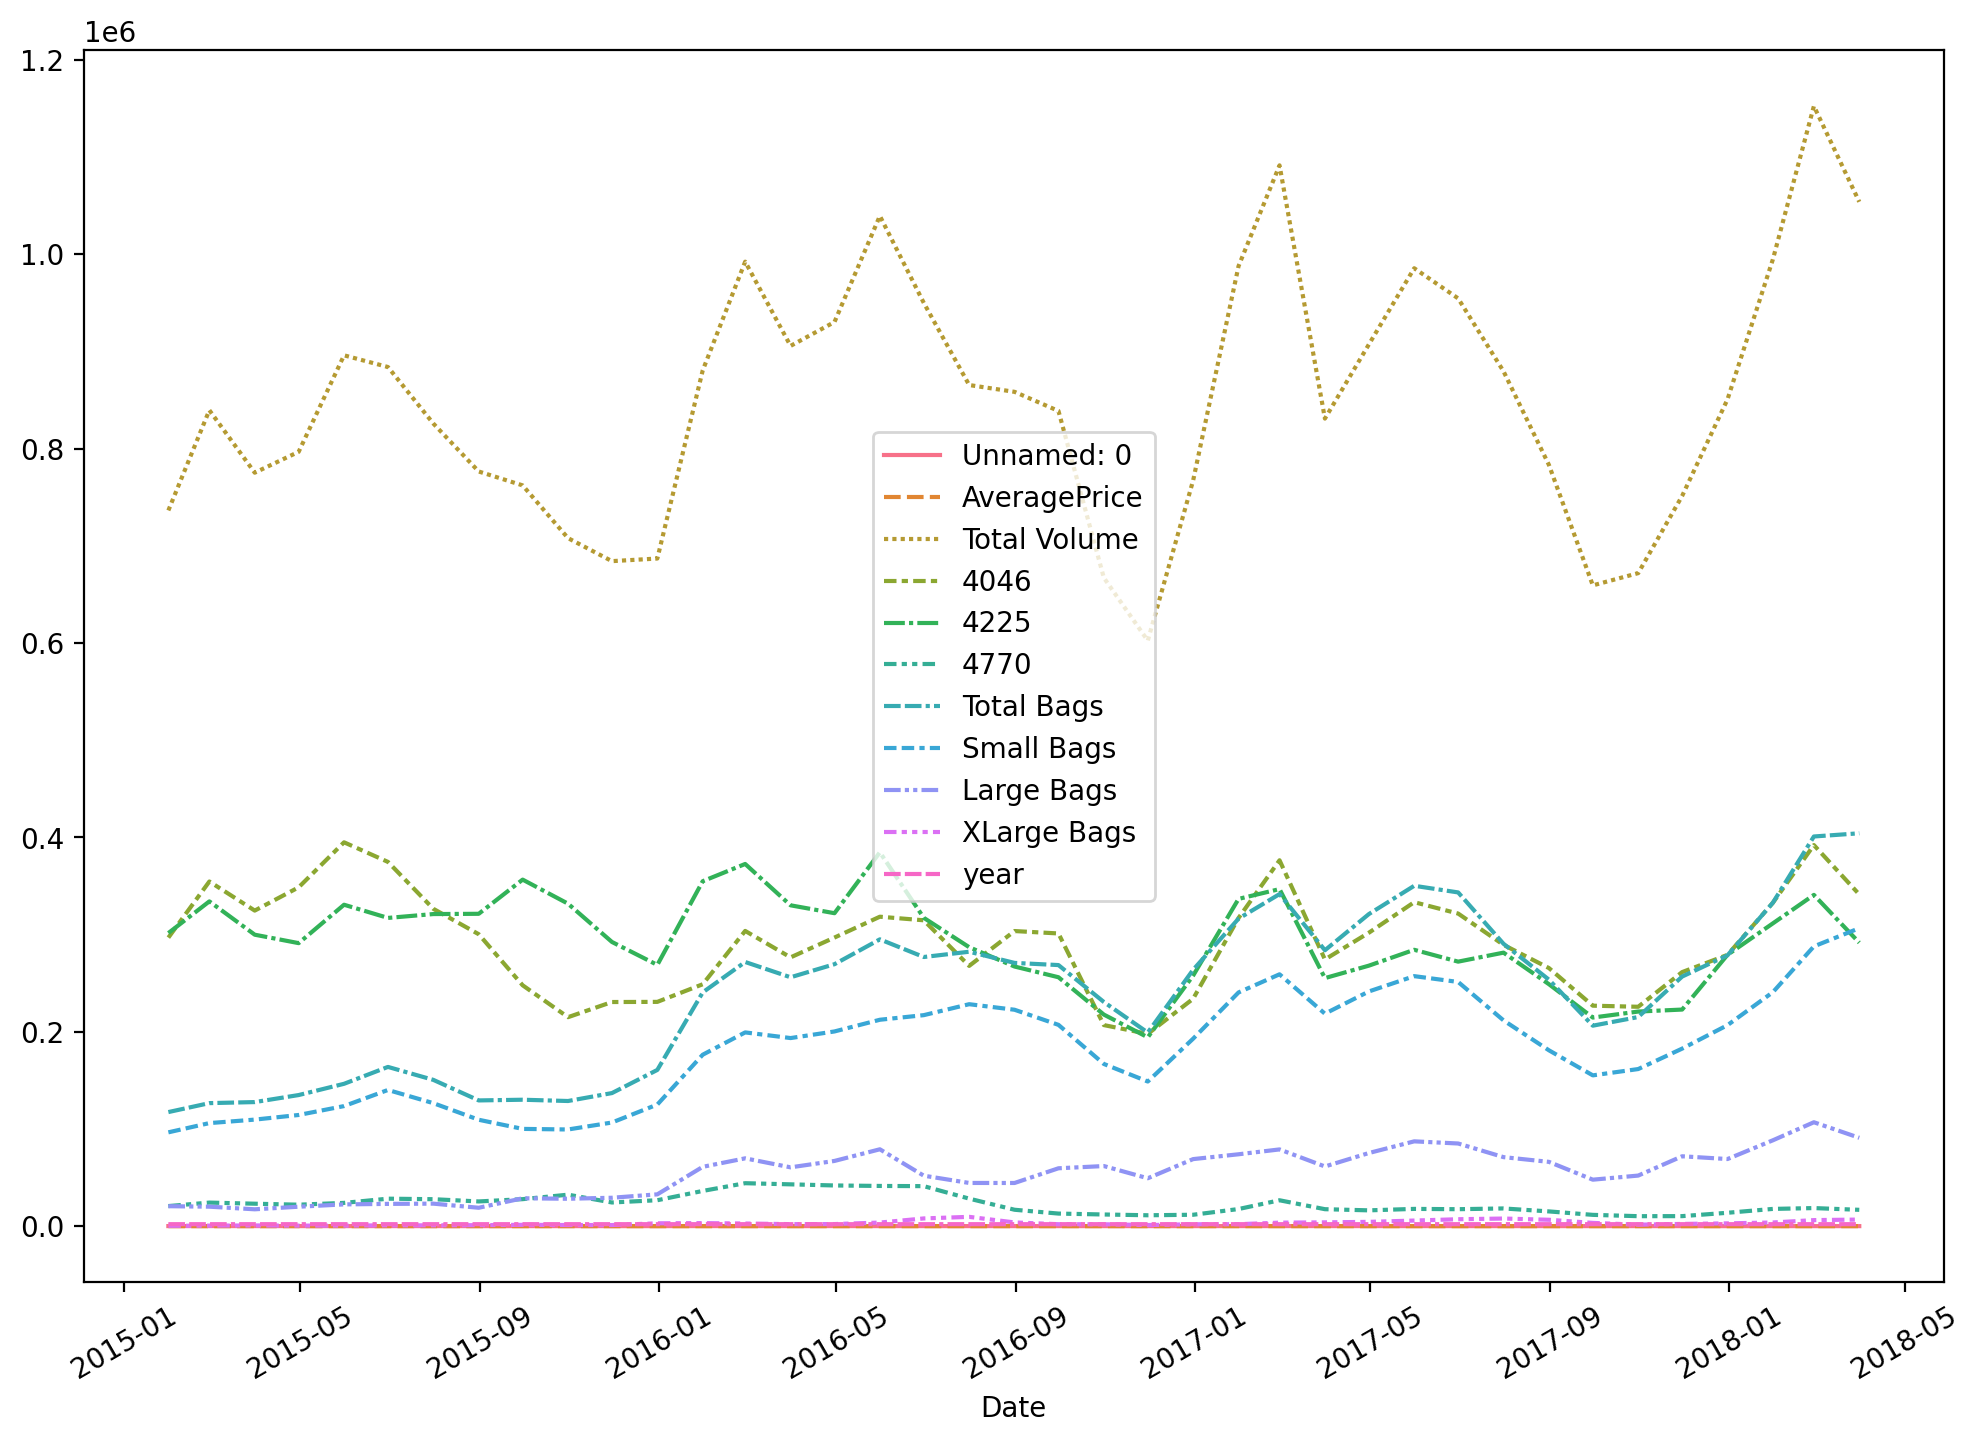

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
df_G  = data.groupby(pd.Grouper(key = 'Date',freq = '1ME')).mean(numeric_only = True)

plt.figure(figsize=(12, 8), dpi=200)
sns.lineplot(data=df_G)
plt.xticks(rotation=30)
plt.show()

Анализ временных рядов показывает, что средняя цена авокадо остается стабильной, в то время как другие переменные, такие как объем продаж и количество сумок, демонстрируют колебания.

Анализ распределения типов авокадо (органический и обычный):

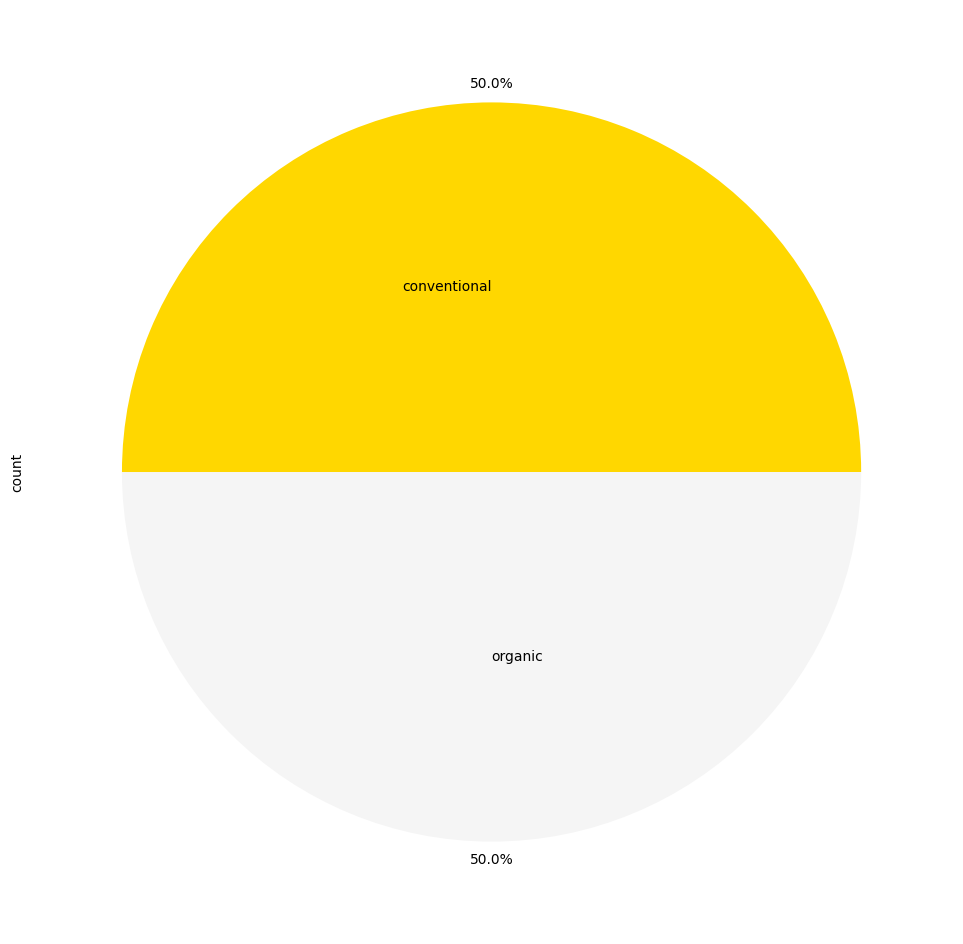

In [ ]:
data['type'].value_counts().plot(kind='pie', stacked=True, colors=['gold', 'whitesmoke'], figsize=(16,12), autopct='%1.1f%%',
       pctdistance=1.05, labeldistance=.5)
plt.show()

Равное распределение:

Типы авокадо распределены абсолютно поровну: 50% органического и 50% обычного. Это может свидетельствовать о равном интересе к обоим типам на рынке.

**Прогнозирование средней цены на авокадо на основе различных характеристик**

**1. Стандартизация данных (Data Standardization)**

In [ ]:
scaler = StandardScaler()

data.loc[:,'Small Bags':'XLarge Bags']= scaler.fit_transform(data.loc[:,'Small Bags':'XLarge Bags'])

**2. Преобразование категориальных переменных и объединение данных:**

Преобразуем категориальные переменные type и region в числовые с помощью pd.get_dummies с параметром drop_first=True, чтобы избежать мультиколлинеарности.

Сделаем выбор числовых переменных: выберем числовые переменные, такие как Small Bags, Large Bags, XLarge Bags и year, которые будут использоваться вместе с преобразованными категориальными переменными.

Объединим преобразованные категориальные переменные и числовые переменные в один DataFrame X с помощью pd.concat.

In [ ]:
Xdum = pd.get_dummies(data[['type','region']], drop_first = True)

Xoth = data[[ 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

Xyear = data['year']



X = pd.concat([Xdum, Xoth], axis = 1)

**3. Разделение данных на обучающую и тестовую выборки:**

Разделим данные на обучающую (X_train, y_train) и тестовую (X_test, y_test) выборки с помощью функции train_test_split. В данном случае, 20% данных используются для тестирования, а 80% — для обучения.

Используем параметр random_state=21, чтобы обеспечить воспроизводимость результатов. Это означает, что при повторном выполнении кода данные будут разделяться одинаково.

После разделения данных мы можем использовать обучающую выборку для обучения модели, а тестовую выборку — для оценки её качества.


In [ ]:
y = data['AveragePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

**3. Перекрестная проверка параметра модели (Hyperparameter Tuning) или подбор гиперпараметров:**

Переберем значения k от 1 до 10, обучим модель KNN для каждого значения и сделаем предсказания на тестовой выборке.

Для каждого значения k мы вычисляем RMSE (корень из среднеквадратичной ошибки) между предсказанными значениями и реальными значениями из тестовой выборки.

Сохраним значения RMSE в список rmse, чтобы впоследствии проанализировать, какое значение k дает наименьшую ошибку.

In [ ]:
rmse = []

for k in range(1,10):
    knn_model = KNeighborsRegressor(n_neighbors=k)

    knn_model.fit(X_train, y_train)

    predx_test = knn_model.predict(X_test)

    rmse.append(np.sqrt(mean_squared_error( y_test, predx_test)))

print(rmse)

[0.20979774996508174, 0.18516419962270733, 0.1794332952886478, 0.17565198508133548, 0.17521063331715134, 0.17460738083747313, 0.1754768733263932, 0.17614430426402533, 0.17768592185549878]


RMSE: Это метрика, которая измеряет среднеквадратичную ошибку между предсказанными значениями и реальными значениями. Чем меньше значение RMSE, тем лучше модель предсказывает данные.

Анализ значений:

Наименьшее значение RMSE (0.17460738083747313) наблюдается при k=6. Это означает, что модель KNN с k=6 дает наилучшие предсказания на тестовой выборке.

Значения RMSE уменьшаются с увеличением k до 6, а затем начинают увеличиваться. Это типично для моделей KNN, где слишком маленькое значение k может привести к переобучению (overfitting), а слишком большое значение k — к недообучению (underfitting).

Вывод:
На основе полученных значений RMSE, оптимальное значение параметра k для модели KNN в данном случае равно 6. Это значение минимизирует ошибку предсказания на тестовой выборке. Таким образом, мы можем использовать k=6 для обучения финальной модели, чтобы получить наилучшие результаты.

**4. Визуализация зависимости ошибки от параметра модели (Error vs. Hyperparameter Visualization):**

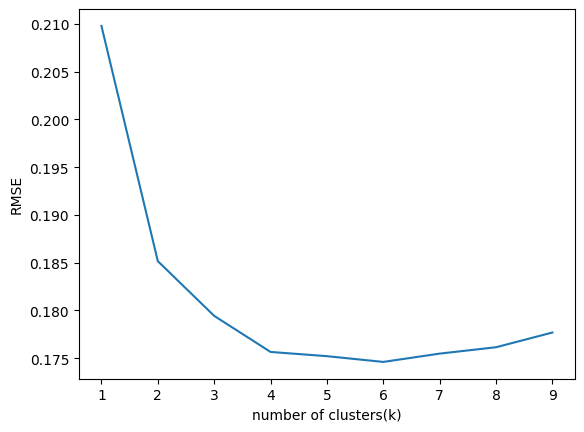

In [ ]:
plt.plot(range(1,10), rmse)
plt.ylabel('RMSE')
plt.xlabel('number of clusters(k)')
plt.show()

На графике видно, что минимальное значение RMSE (около 0.175) достигается при k=6. Это означает, что модель KNN с k=6 дает наилучшие предсказания на тестовой выборке.

Поведение модели:

При малых значениях k (например, k=1 или k=2), RMSE относительно высокое, что может указывать на переобучение (overfitting).

При увеличении k до 6, RMSE уменьшается, что свидетельствует о том, что модель становится более стабильной и обобщает данные лучше.

При дальнейшем увеличении k (например, k=7, k=8, k=9), RMSE начинает увеличиваться, что может указывать на недообучение (underfitting).

**5. Обучение модели и предсказание (Model Training and Prediction):**

Создадим объект модели KNN с параметром n_neighbors=6.

Обучим модель на обучающей выборке (X_train, y_train), чтобы она "научилась" предсказывать целевую переменную на основе признаков.

Используем обученную модель для предсказания целевой переменной на тестовой выборке (X_test).

In [ ]:
model = KNeighborsRegressor(n_neighbors=6)

model.fit(X_train, y_train)

predx = knn_model.predict(X_test)

**6. Оценка качества модели (Model Evaluation):**

Вычислим RMSE между предсказанными значениями (predx) и реальными значениями (y_test). RMSE показывает, насколько в среднем предсказанные значения отличаются от реальных.

Вычислим коэффициент детерминации (R²), который показывает, насколько хорошо модель объясняет изменения в данных. Значение R² близкое к 1 указывает на то, что модель хорошо объясняет данные.

In [ ]:
rmse = np.sqrt(mean_squared_error( y_test, predx))

r2 = r2_score(y_test, predx)

**7. Вывод метрик качества модели (Model Performance Metrics Output):**

In [ ]:
print(f'RMSE --> {rmse}')
print(f'R2 --> {r2}')

RMSE --> 0.17768592185549878
R2 --> 0.8063537576807286


**Значение RMSE равно 0.17768592185549878.**
RMSE показывает, насколько в среднем предсказанные значения отличаются от реальных. Чем меньше RMSE, тем лучше модель.

В данном случае, RMSE относительно небольшое, что указывает на то, что модель делает достаточно точные предсказания.

**Значение R² равно 0.8063537576807286.**
R² показывает, насколько хорошо модель объясняет изменения в данных. Значение R² близкое к 1 указывает на то, что модель хорошо объясняет данные.

В данном случае, R² равно примерно 0.806, что означает, что модель объясняет около 80.6% изменчивости целевой переменной (AveragePrice). Это достаточно хороший результат, но есть возможности для улучшения.

**8. Вывод прогнозируемых значений (предсказанные цены):**

In [ ]:
print(predx)

[1.04888889 1.18222222 0.81444444 ... 1.56222222 1.32       1.66555556]


**9. Визуализация предсказаний модели (Model Prediction Visualization):**

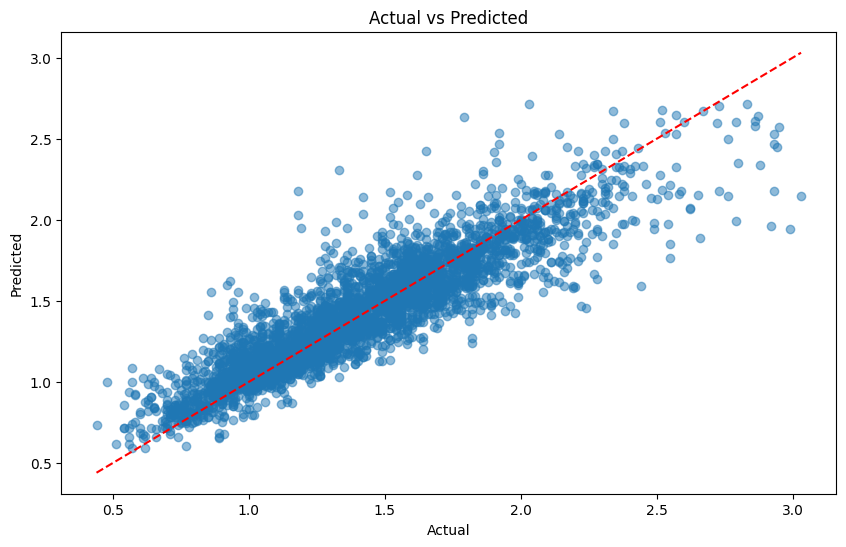

In [122]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predx, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Линия идеального предсказания
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Точки на графике в основном расположены вблизи красной линии, что указывает на то, что модель делает достаточно точные предсказания.

Однако, некоторые точки отклоняются от линии, что говорит о наличии ошибок в предсказаниях. Это может быть связано с тем, что модель не всегда точно предсказывает значения в определенных диапазонах.

Ошибки в предсказаниях неравномерно распределены. Возможно, модель плохо работает в определенных диапазонах значений (например, в нижнем или верхнем диапазоне цен).

В целом, модель показывает достаточно хорошие результаты, так как большинство точек расположены близко к линии идеального предсказания.


**10. Сохранение результатов предсказаний (Saving Prediction Results):**

In [121]:
predictions_df = pd.DataFrame({'Real': y_test, 'Predicted': predx})
predictions_df.to_csv('predictions.csv', index=False)

**Вывод:** В ходе анализа мы успешно построили модель KNN для предсказания средней цены авокадо. Модель показала достаточно хорошие результаты, но есть возможности для улучшения.